# Project: Investigate a Dataset (tmdb_movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'></a>
# Introduction

### Dataset Description
This dataset(tmdb-movies) contains relevant information about the movie industry from 1966 to 2015. The dataset is made up of 12 columns and 10866 rows. These columns include id, imdb_id, popularity, budget, revenue, original_title, cast,	homepage, director, tagline, overview, runtime,	genres etc....

# Question(s) for Analysis
The questions to be explored within this dataset includes:
1. Top 10 highest grossing movies of all-time?
2. What is the movies industry's most profitable year in the most recent decade?
3. What is the relationship between overall annual Profit and Budget in the movies industry for the most recent decade?
4. What is the relationship between overall annual Profit and Revenue in the movies industry for the most recent decade?
5. What are the most popular genres from year to year?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <a id='wrangling'></a>
## Data Wrangling

Here, we start by exploring the dataset to get familiar with it. Afterwards, we search for anormalies such as duplicates, missing values, incorrect datatype, incorrect spellings etc and clean it make the data free from anormalies. Moreover, this is to make sure that only data relevant to our analysis are available.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# we start by loading the csv file we will be working with
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.shape

(10866, 21)

### Summary Statistics

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<AxesSubplot:xlabel='release_year', ylabel='revenue'>

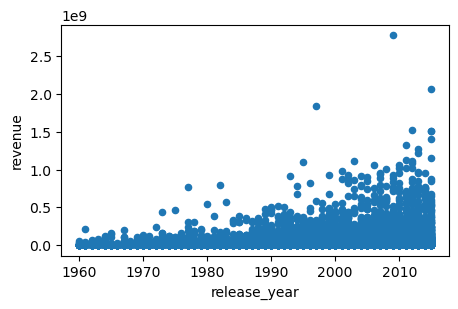

In [9]:
df.plot.scatter('release_year', 'revenue', figsize=(5,3))

The graph depicts postive relationship between release_year and revenue. As years went by revenue increases as well.

In [10]:
# testing the correlation between release_year and revenue
df.release_year.corr(df.revenue)

0.057048032145909984

<AxesSubplot:ylabel='Frequency'>

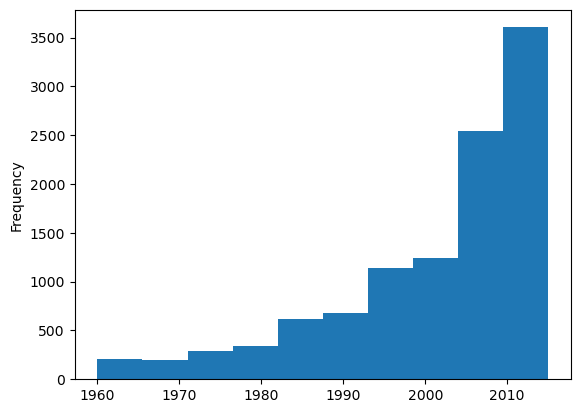

In [12]:
df['release_year'].plot(kind='hist')

The graph depict's a left skew, thus a negative skew. This means the average or mean is disproportionately affected by the outliers in this extreme values. This is a bad measure of centrality.

In [13]:
# testing skewness of the graph
df.release_year.skew()

-1.204254293629925

Let's find the average value within the date

In [16]:
df['revenue'].median()

0.0

The median is inaccessible is some columns. This tells the that some of the columns like budget, revenue, budget_adj and revenue_adj are filled with 0's as values.

## Data Cleaning (cleaning data from tmdb-movies dataset not relevant to our analysis)
From what was observed from the exploration section, what we will be doing in this section includes:
1. dropping columns such as id, homepage, keyword, overview as they are quit redundant and not so relevant to our analysis.
2. renaming columns 
3. checking for and deleting duplicated rows from the dataset.
3. checking and deleting missing columns from non-numeric columns like imdb_id, director, tagline, keywords, overview, genres, 
   production_companies etc.
4. correcting incorrect data types from columns like release_date, from string to a datetime
5. dropping columns containing zeros.
6. splitting few columns containing pipes('|')

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#### Dropping columns that aren't relevant to our analysis

In [18]:
# dropping columns that aren't relevant to our analysis
df.drop([ 'id', 'imdb_id', 'homepage', 'tagline', 'keywords','overview'], axis=1, inplace=True)

We check and delete duplicated columns

In [19]:
# Let's find the number of duplicates
df.duplicated().sum()

1

In [20]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [21]:
# Recheck to determine whether duplicates still exist
df.duplicated().sum()

0

In [22]:
df.duplicated().sum().any()

False

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int6

#### Renaming columns

In [24]:
df = df.rename(columns={'vote_average': 'movie_ratings', 'original_title': 'movie_title'})
df.head(1)

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### checking and deleting missing values from all non-numeric columns in the dataset

In [25]:
# Checking for the amount of missing values in each column of the Dataframe
df.isna().sum()


popularity                 0
budget                     0
revenue                    0
movie_title                0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
movie_ratings              0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [26]:
# we drop all missing values from the columns
df.dropna(inplace=True)
df.isna().sum()

popularity              0
budget                  0
revenue                 0
movie_title             0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
movie_ratings           0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [27]:
df.isna().sum().any()

False

#### Dropping columns containing zero's

In [28]:
# let's the number of zero's in all columns
df[df == 0].count()

popularity                 0
budget                  4751
revenue                 5022
movie_title                0
cast                       0
director                   0
runtime                   13
genres                     0
production_companies       0
release_date               0
vote_count                 0
movie_ratings              0
release_year               0
budget_adj              4751
revenue_adj             5022
dtype: int64

In [29]:
# selecting all columns which do not contain 0's in their respective rows
df = df.loc[(df != 0).all(axis=1)]

In [30]:
# checking whether zero's still exist
df[df == 0].count()

popularity              0
budget                  0
revenue                 0
movie_title             0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
movie_ratings           0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Converting columns

In [31]:
# We proceed by correcting or converting the release_date column from object to a datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10822   2066-06-21
10828   2066-07-13
10829   2066-12-17
10835   2066-12-20
10848   2066-08-24
Name: release_date, Length: 3805, dtype: datetime64[ns]

In [32]:
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
movie_title                     object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
movie_ratings                  float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object


#### Splitting rows in Columns containing Pipes('|') into individual rows

In [33]:
df.head()

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's create a function from which we can apply genres column to split the column before exploding it

In [34]:
# creating a function which would be applied to all columns containing pipe character

def splittero(x):
   return x.str.split("|")

In [35]:
# applying function to genres column
df.genres = df.genres.transform(splittero)

In [36]:
df.head(1)

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Here, we proceed to split the columns transformed into list using the explode function

In [37]:
df = df.explode(['genres'], ignore_index=True)

In [38]:
df.head()

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10180 entries, 0 to 10179
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10180 non-null  float64       
 1   budget                10180 non-null  int64         
 2   revenue               10180 non-null  int64         
 3   movie_title           10180 non-null  object        
 4   cast                  10180 non-null  object        
 5   director              10180 non-null  object        
 6   runtime               10180 non-null  int64         
 7   genres                10180 non-null  object        
 8   production_companies  10180 non-null  object        
 9   release_date          10180 non-null  datetime64[ns]
 10  vote_count            10180 non-null  int64         
 11  movie_ratings         10180 non-null  float64       
 12  release_year          10180 non-null  int64         
 13  budget_adj      

In [40]:
df.shape

(10180, 15)

# <a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Top 10 highest grossing movies of all-time?)

In [42]:
df

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Drama,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10176,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,War,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10177,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10178,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


In [44]:
# now we group by release_year and then movie title then sum up each movie by revenue to get the total amount of revenue each
# made
df.groupby(by=['release_year', 'movie_title'], as_index=False)['revenue'].sum()

,release_year,movie_title,revenue
0,1960,Cinderfella,14200000
1,1960,Psycho,96000000
2,1960,Spartacus,180000000
3,1960,The Apartment,75000000
4,1960,The Magnificent Seven,14715000
...,...,...,...
3800,2015,Victor Frankenstein,102681894
3801,2015,War Room,67790117
3802,2015,We Are Your Friends,33366270
3803,2015,While We're Young,15174970


In [45]:
movies_revenue = df.groupby(by=['release_year', 'movie_title'], as_index=False)['revenue'].sum()

In [46]:
# selecting the top movies with the help of the nlargest function
top_10 = movies_revenue.nlargest(10, 'revenue')
top_10

,release_year,movie_title,revenue
2622,2009,Avatar,11126023388
3747,2015,Star Wars: The Force Awakens,8272712900
3703,2015,Jurassic World,6054115240
1130,1997,Titanic,5535102564
949,1995,The Net,5531398290
3718,2015,Minions,4626923848
1899,2004,Shrek 2,4599193790
3256,2012,The Avengers,4558673730
3682,2015,Furious 7,4518748080
3260,2012,The Dark Knight Rises,4324165148


Text(0.5, 1.0, 'Top 10 Highest Grossing Movies of all-time')

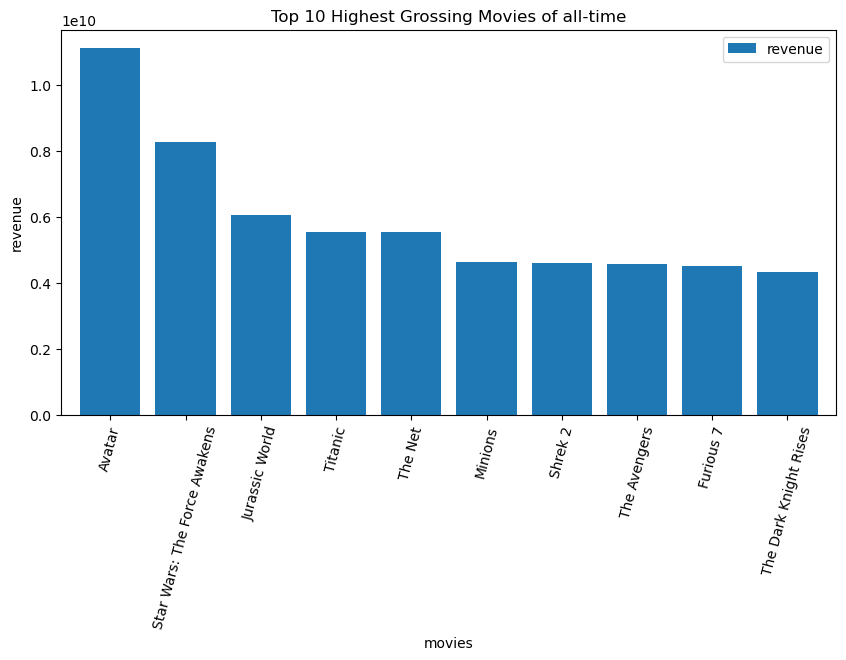

In [47]:
top_10.plot.bar('movie_title', 'revenue', width=0.8, figsize=(10, 5), rot=75)
plt.xlabel('movies')
plt.ylabel('revenue')
plt.title('Top 10 Highest Grossing Movies of all-time')

The chart above indicates the top 10 movies to have enjoyed the most success throughout lifetime. This movies range from
2009: Avatar  
2015: Star Wars: The Force Awakens  
1997: Titanic  
1995: The Net  
2015: Minions  
2004: Shrek 2  
2012: The Avengers  
2015: Furious  
2012: The Dark Knight Rises  

In [48]:
worst_10 = movies_revenue.nsmallest(10, 'revenue')
worst_10

,release_year,movie_title,revenue
926,1995,Mallrats,4
1773,2003,Shattered Glass,4
967,1996,Bordello of Blood,10
1746,2003,Kid's Story,10
813,1993,The House of the Spirits,12
931,1995,Never Talk to Strangers,12
1235,1999,Angela's Ashes,13
176,1978,F.I.S.T.,22
945,1995,Tales from the Hood,22
1836,2004,Chasing Liberty,24


### Research Question 2  (most profitable year in the movies industry in the most recent decade)

In [49]:
df.head(3)

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


To get the most recent decade we filter starting from 2006 to till the most recent date

In [50]:
# we filter the rows starting from 2006 up to the the most recent year, using the release_year column. After, we assign it a new
# column called recent_decade
recent_decade = df[df['release_year'] > 2005]
recent_decade.head(100)

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.899557,49000000,102069268,Chappie,Sharlto Copley|Dev Patel|Ninja|Yolandi Visser|...,Neill Blomkamp,120,Action,Columbia Pictures|Media Rights Capital|Sony Pi...,2015-03-04,1990,6.6,2015,4.507998e+07,9.390369e+07
96,3.899557,49000000,102069268,Chappie,Sharlto Copley|Dev Patel|Ninja|Yolandi Visser|...,Neill Blomkamp,120,Science Fiction,Columbia Pictures|Media Rights Capital|Sony Pi...,2015-03-04,1990,6.6,2015,4.507998e+07,9.390369e+07
97,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,Elizabeth Banks,115,Comedy,Universal Pictures|Gold Circle Films|Brownston...,2015-05-07,1264,6.8,2015,2.667999e+07,2.645056e+08
98,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,Elizabeth Banks,115,Music,Universal Pictures|Gold Circle Films|Brownston...,2015-05-07,1264,6.8,2015,2.667999e+07,2.645056e+08


In [51]:
recent_decade['release_year'].unique()

array([2015, 2014, 2009, 2010, 2008, 2011, 2012, 2013, 2006, 2007],
      dtype=int64)

Here we sum up every column by year to get the total budget and revenue in each year

In [52]:
# grouping the columns by release_years
recent_decade = recent_decade.groupby('release_year').sum()
recent_decade

,popularity,budget,revenue,runtime,vote_count,movie_ratings,budget_adj,revenue_adj
release_year,,,,,,,,
2006,473.263782,20790293000,45942896211,49136,199933,2729.2,2.248822e+10,4.969501e+10
2007,483.050059,21157190000,58539304349,46158,234037,2655.3,2.225035e+10,6.156395e+10
2008,510.580446,20361384000,53174025108,48322,252447,2681.8,2.062174e+10,5.385394e+10
2009,607.141731,23228046952,70359067759,50081,325217,2822.3,2.360900e+10,7.151299e+10
2010,595.807440,25661149114,64958274921,50377,350661,2849.8,2.566115e+10,6.495827e+10
2011,649.833721,25028125518,69675105173,52935,347209,3030.6,2.426222e+10,6.754291e+10
2012,606.092012,22276461550,71026351897,42325,460521,2377.2,2.115694e+10,6.745687e+10
2013,670.258076,24747045551,70024135674,47452,514585,2683.6,2.316406e+10,6.554493e+10
2014,1120.911781,22117036000,71520667334,42380,473332,2462.0,2.037180e+10,6.587705e+10


We subtract the budget from the revenue to get the profit that was made from year to year.

In [53]:
# to arrive at the profits made each year, we create a new column, subtract budget from revenue
recent_decade['profit'] = recent_decade['revenue'] - recent_decade['budget']

In [54]:
recent_decade = recent_decade.loc[:, ['budget','revenue', 'profit']]
recent_decade

,budget,revenue,profit
release_year,,,
2006,20790293000,45942896211,25152603211
2007,21157190000,58539304349,37382114349
2008,20361384000,53174025108,32812641108
2009,23228046952,70359067759,47131020807
2010,25661149114,64958274921,39297125807
2011,25028125518,69675105173,44646979655
2012,22276461550,71026351897,48749890347
2013,24747045551,70024135674,45277090123
2014,22117036000,71520667334,49403631334


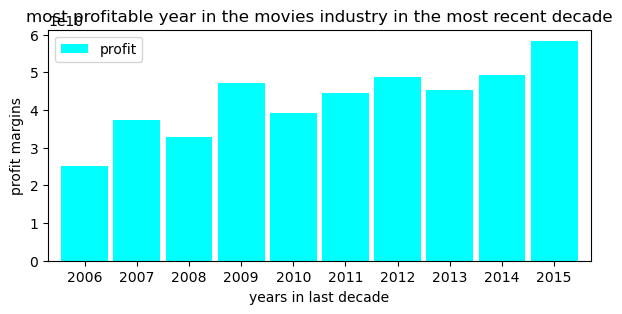

In [55]:
# Here, we plot the profits earned in each year using bar chart

recent_decade.profit.plot(x='release_year', y='profit', kind='bar', color='cyan', figsize=(7,3), width=0.9, rot=0)
plt.title('most profitable year in the movies industry in the most recent decade')
plt.xlabel('years in last decade')
plt.ylabel('profit margins')
plt.legend()

Visualization from chart shows that 2015 happens to be the most successful year with a profit of over 58 billion dollars. 2006, the least successful for the past decade making over 25 billion dollars.

#### Now , let's compare profits in relation to budget

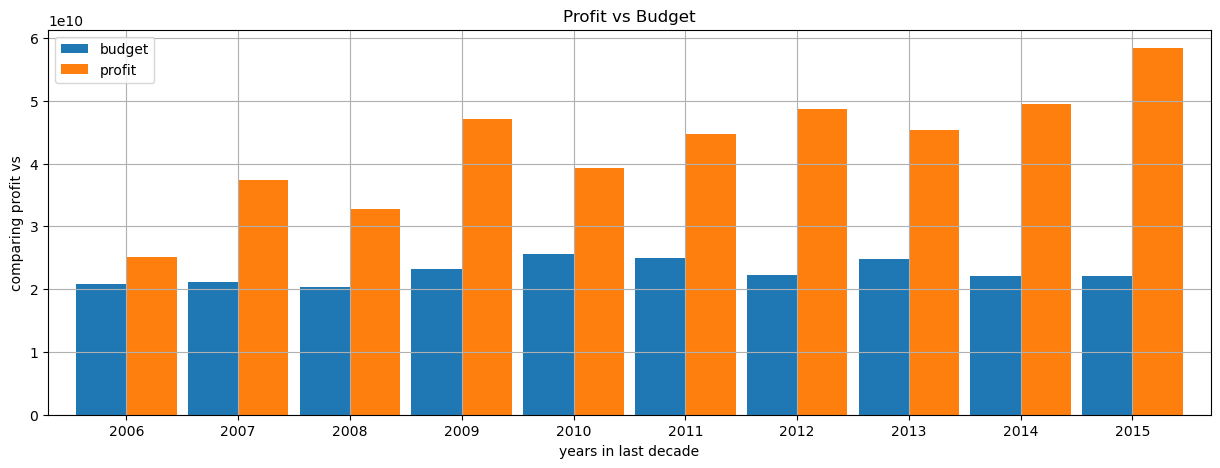

In [56]:
recent_decade.loc[:, ['budget', 'profit']].plot(kind='bar', figsize=(15,5), width=0.9, rot=0)
plt.title('Profit vs Budget')
plt.xlabel('years in last decade')
plt.ylabel('comparing profit vs')
plt.grid()
plt.legend()

In accordance with the obsevation, it turns out the movie industry for the past decade made more than twice the amount they budgeted for, and this trend continued consistently on an annual basis.

### Research Question 3 (Relationship between overall annual Profit and Budget in the movies industry for the most recent decade)

Now let's do a comparison between total Profits the movies industry made annually for a decade against corresponding budget they made for each year in order to determine their relationship

Text(0.5, 1.0, 'Relationship between Profit vs Revenue annually for the most recent decade')

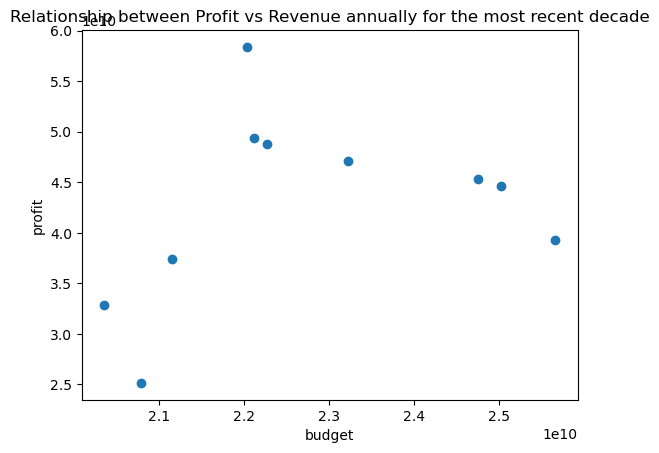

In [57]:
plt.scatter(recent_decade.budget, recent_decade.profit)
plt.xlabel('budget')
plt.ylabel('profit')
plt.title('Relationship between Profit vs Revenue annually for the most recent decade')

The observation above emanates from the annual profit the movie industry makes yearly for the past decade. It graph implies a little relationship between budget and profit. Eventhough profit increased as budget increases, profit diminished at a point as budget continued to rise.

In [58]:
# running correlation to determine relationship between budget and profit
recent_decade.budget.corr(recent_decade.profit)

0.31670800510602953

### Research Question 4 (Relationship between overall annual Profit and Revenue in the movies industry for the most recent decade)

Lets do a comparison between total Profits the movies industry made annually for a decade against corresponding revenue they made for each year in order to determine their relationship

Text(0.5, 1.0, 'Relationship between Profit vs Revenue annually for the most recent decade')

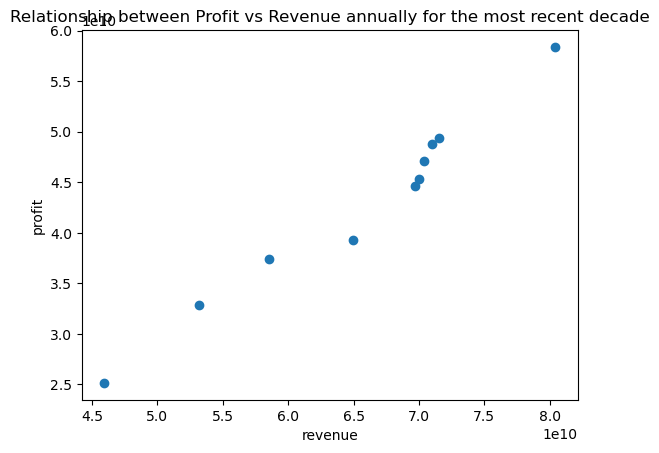

In [59]:
plt.scatter(recent_decade.revenue, recent_decade.profit)
plt.xlabel('revenue')
plt.ylabel('profit')
plt.title('Relationship between Profit vs Revenue annually for the most recent decade')

The observation above emanates from the annual profit of the movie industry for the past decade. It show a positive relationship between revenue and profit. This is because a revenue in the movie industry increases, revenue in stack comparison also increase.

In [60]:
# running correlation to determine relationship between revenue and profit
recent_decade.revenue.corr(recent_decade.profit)

0.9849184323624073

## Research Question 5 (most popular genres from year to year?)

In [61]:
df.head(2)

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [62]:
# here, we split the columns into unique groups and subgroups using both release_year and genres column, then we sum up 
# by popularity to determine the most popular genres in each year
df2 = df.groupby(['release_year', 'genres'], as_index=False)[['popularity']].count()
df2

,release_year,genres,popularity
0,1960,Action,2
1,1960,Adventure,1
2,1960,Comedy,2
3,1960,Drama,3
4,1960,History,1
...,...,...,...
834,2015,Romance,18
835,2015,Science Fiction,22
836,2015,Thriller,47
837,2015,War,5


#### Reshaping DataFrame with pivot method in order to transpose genres into individual columns

In [63]:
# applying pivot to df2 to reshape our dataframe and using fillna to fill null values while converting datatypes
df_pivot = df2.pivot(index = 'release_year', columns = 'genres', values = 'popularity').fillna(0).convert_dtypes()
df_pivot

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1961,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
1962,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
1963,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
1964,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0
1965,2,2,0,1,0,0,3,1,0,0,1,0,1,0,2,0,0,1,1,0
1966,2,2,0,0,0,0,2,0,0,0,0,0,0,1,1,1,0,1,1,1
1967,3,5,1,5,4,0,7,2,1,0,0,0,2,1,4,0,0,3,1,0
1968,2,3,0,0,1,0,6,1,0,0,1,1,1,3,1,3,0,1,2,1


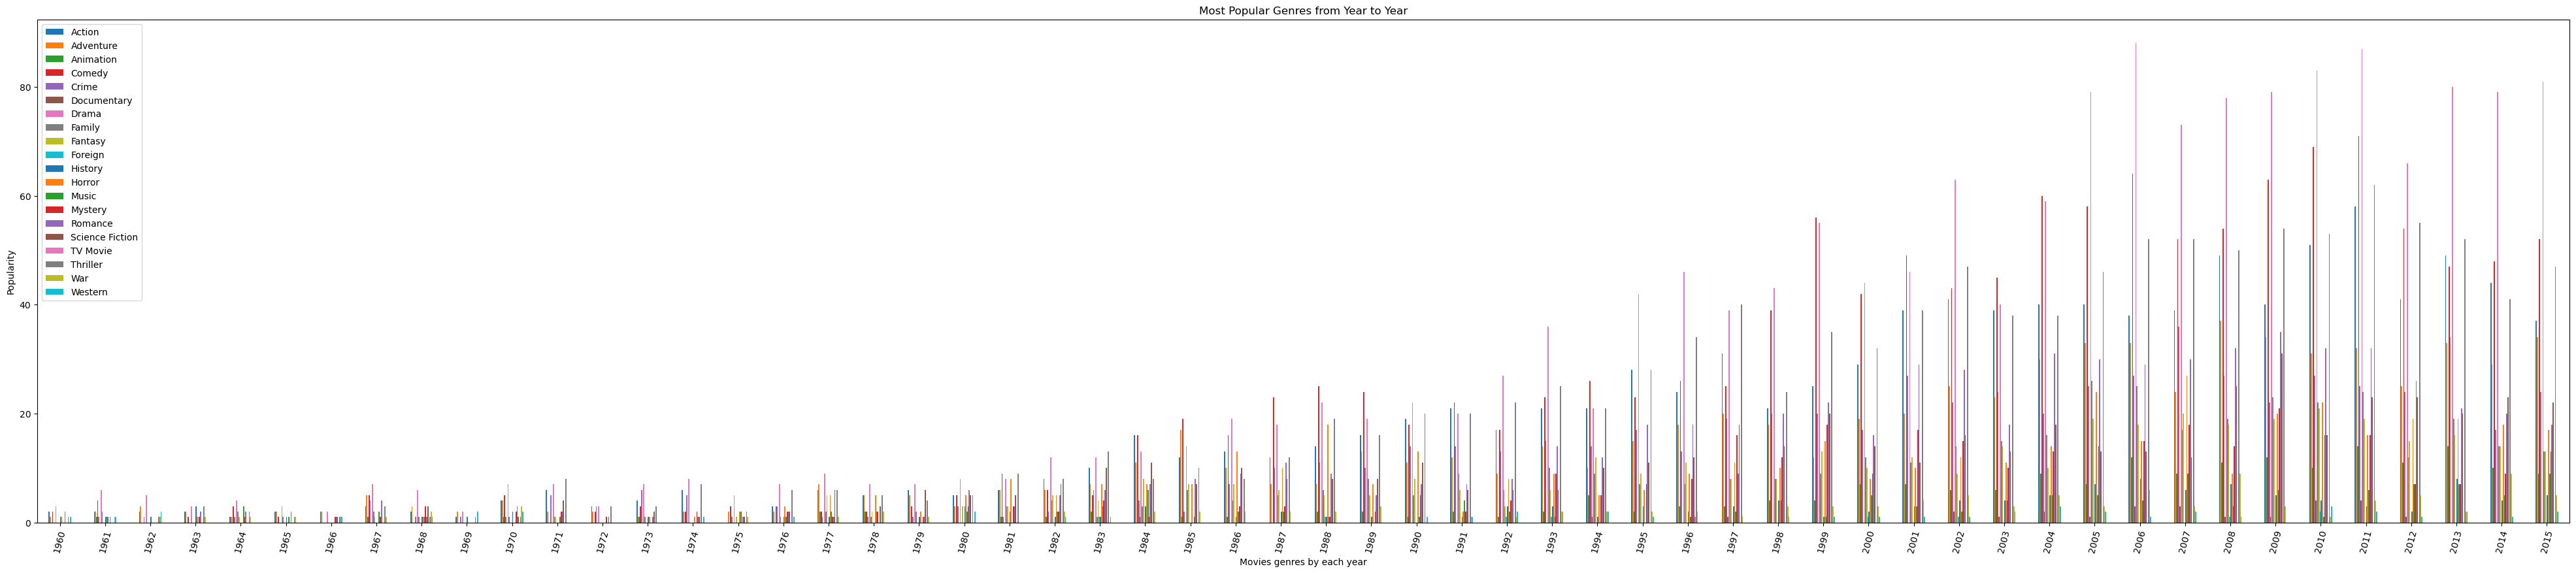

In [64]:
# we plot a bar chart with the year in question on the x-axis and the number of times a genre appeared in each year on 
# the y-axis
df_pivot.plot(kind='bar', rot=75, figsize=(50,10))
plt.xlabel('Movies genres by each year')
plt.ylabel('Popularity')
plt.title('Most Popular Genres from Year to Year')
plt.legend()

The visualization depicts the most popular genres in each year from 1960 to 2015. However, the chart is long and takes makes it stressful to figure the most popular genres overall. Due to this we'll need to group release_year by decades in order to make it easier to depict the most popular genres by decade.

#### most popular genres over the years with the help of pandas.cut method

In [67]:
df_copy = df.copy()
df_copy.head(1)

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Here, we start by creating a new column to hold the years we categorized into decades with the help of pandas.cut method

In [68]:
# categorizing years into decades with the help of the pandas cut method
cutoff=[1960, 1970, 1980, 1990, 2000, 2010, 2015]
label=["1960's", "1970's", "1980's", "1990's","2000's", "2010's"]
df_copy['date_by_decade'] = pd.cut(df_copy['release_year'], bins=cutoff, labels=label)

In [69]:
df_copy

,popularity,budget,revenue,movie_title,cast,director,runtime,genres,production_companies,release_date,vote_count,movie_ratings,release_year,budget_adj,revenue_adj,date_by_decade
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2010's
1,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2010's
2,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2010's
3,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2010's
4,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2010's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Drama,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08,1960's
10176,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,War,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08,1960's
10177,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08,1960's
10178,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07,1960's


Grouping data by decades('date_by_decade') and within each decade we group by genres and determine their popularity by the amount of times they appear in each decade 

In [70]:
# creating groups by decades and genres
decade=df_copy.groupby(['date_by_decade', 'genres'], as_index=False)[['popularity']].count()
decade 

,date_by_decade,genres,popularity
0,1960's,Action,21
1,1960's,Adventure,26
2,1960's,Animation,3
3,1960's,Comedy,19
4,1960's,Crime,10
...,...,...,...
115,2010's,Science Fiction,111
116,2010's,TV Movie,0
117,2010's,Thriller,257
118,2010's,War,25


Here, we reshape our data by pivoting it in order to transpose genres into individual columns and decades into index

In [71]:
decade = decade.pivot(index='date_by_decade', columns='genres', values='popularity')
decade

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
date_by_decade,,,,,,,,,,,,,,,,,,,,
1960's,21,26,3,19,10,0,45,9,2,0,10,3,8,9,16,5,0,14,12,9
1970's,44,31,5,25,29,0,68,8,12,0,7,24,10,14,15,31,0,49,5,4
1980's,126,95,11,161,67,1,159,45,58,2,12,95,17,25,70,85,0,123,15,3
1990's,238,147,33,299,162,2,373,85,86,3,23,83,20,90,144,117,1,281,20,11
2000's,416,290,89,557,257,18,688,188,160,4,53,164,42,153,294,168,0,469,42,16
2010's,229,153,58,272,124,5,393,82,77,0,22,89,34,52,117,111,0,257,25,8


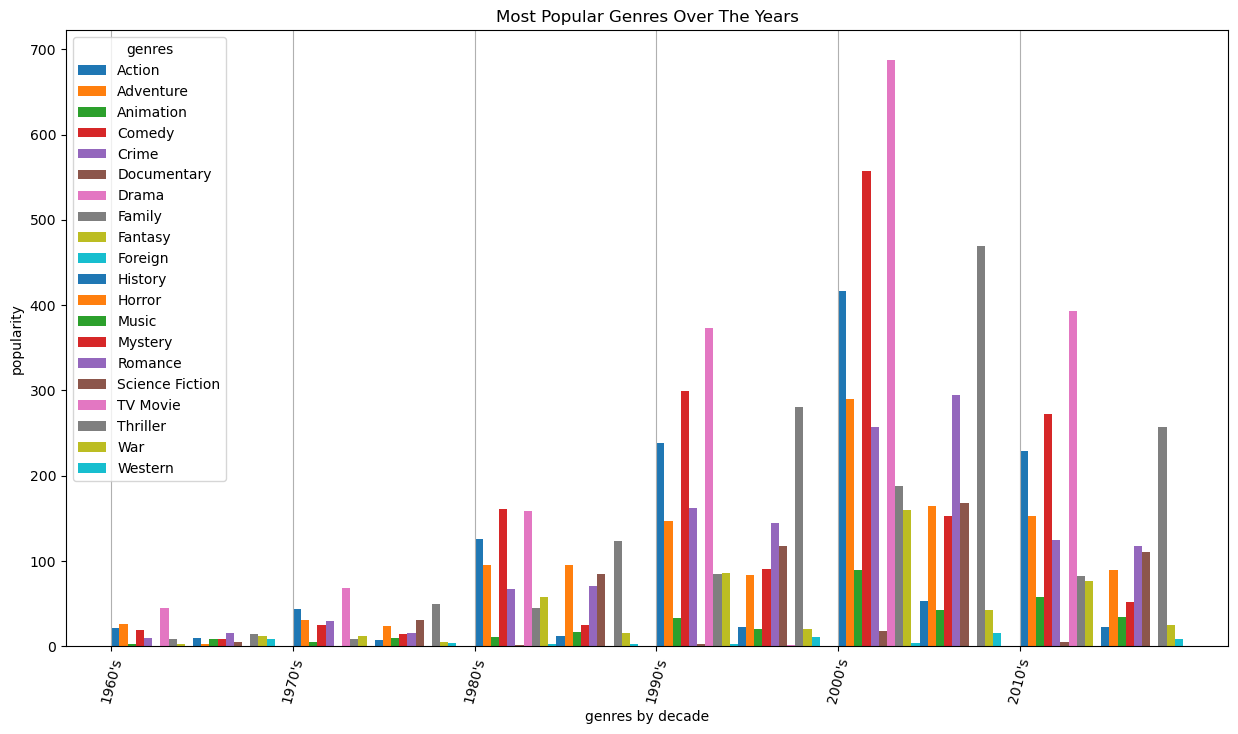

In [72]:
decade.plot(kind='bar', figsize=(15, 8), width= 0.9, align='edge', rot=75)
plt.xlabel('genres by decade')
plt.ylabel('popularity')
plt.title('Most Popular Genres Over The Years')
plt.grid(axis='x')

The observation above shows that genres popularity changes with time. The three most popular genres by each decade include;
1960's: Drama, Adventure and Action  
1970's: Drama, Thriller and Action  
1980's: Comedy, Drama and Action  
1990's: Drama, Comedy and Thriller  
2000's: Drama, Comedy and Thriller  
2010's: Drama, Comedy and Thriller  

# <a id='conclusions'></a>
# Conclusions

From my analysis some of the conclusions drawn was that:
1. The highest grossing movies of all time are Avatar, Star Wars, Jurassic World, Titanic, The Net etc.
2. The most profitable year in the movies industry was 2015.
3. The most popular genres are Drama, Comedy, Thriller and Action. This are genres that initially need be considered before any other.
4. A well planned budget should be considered when investing in the movies industry.


# Limitations

1. Certain values entered in this dataset are made up of unrecognisable characters that aren't english and as a matter of fact cannot be read and understood.
2. The dataset is not up-to-date as it begins and ends from 1960 to 2015.
3. There's no vivid description of each column in the dataset making some columns quite redundant.
4. The dataset contains huge amount of 0's.


#### REFERENCED

@coreyms Youtube  
@KevinZhao medium.com  
@antra0497 Github  
W3Schools  
Pandas.pydata.org   
AhmedS-Ekmekawy Github  
Bijus.com  

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigating tmdb-movies dataset.ipynb'])

1